In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # must be installed on your system
    "mathtext.fontset": "cm",             # Computer Modern math, matches LaTeX style
    "text.usetex": True                    # render text via LaTeX
})

In [2]:
# Valencia-9 p Struktur 5-3
file_path_topography = r"H:\Seafile\Master\Data\AFM\2025-12-11_Valencia\relevant\Valencia-p_Struktur-5-3_topograhy.txt"
file_path_current = r"H:\Seafile\Master\Data\AFM\2025-12-11_Valencia\relevant\Valencia-p_Struktur-5-3_current.txt"

topography_array = np.loadtxt(file_path_topography, delimiter=None)
current_array = np.loadtxt(file_path_current, delimiter=None)

In [21]:
physical_width = 40   # x in µm
physical_height = 40  # y in µm

ny, nx = topography_array.shape

x_1d = np.linspace(0, physical_width, nx)
y_1d = np.linspace(physical_height, 0, ny) 

X, Y = np.meshgrid(x_1d, y_1d)

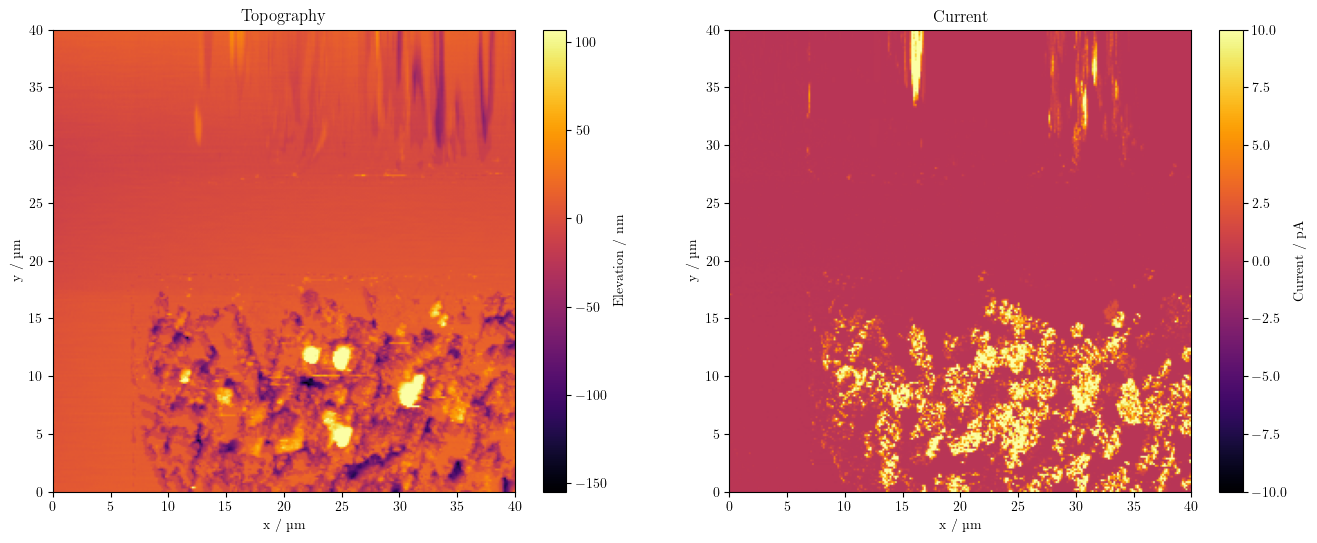

In [106]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
# remove top 1% from colorbar for better contrast
vmax = np.percentile(topography_array, 99.5)   # ignore top 0,5%
# vmin = np.percentile(topography_array, 1)    # optional

topography = ax1.imshow(topography_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=vmax)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")


ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=10, vmin=-10)  # plasma inferno Spectral viridis magma
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

### select contact area only

In [49]:
x_min, x_max = 5, 40
y_min, y_max = 0, 21

# boolean mask using the meshgrid
mask = (X >= x_min) & (X <= x_max) & (Y >= y_min) & (Y <= y_max)
# apply mask to the data (just using 2D_array[mask] creates flattend list => use row + column filter)
rows = np.any(mask, axis=1)
cols = np.any(mask, axis=0)
topography_contact = topography_array[np.ix_(rows, cols)]
current_contact = current_array[np.ix_(rows, cols)]

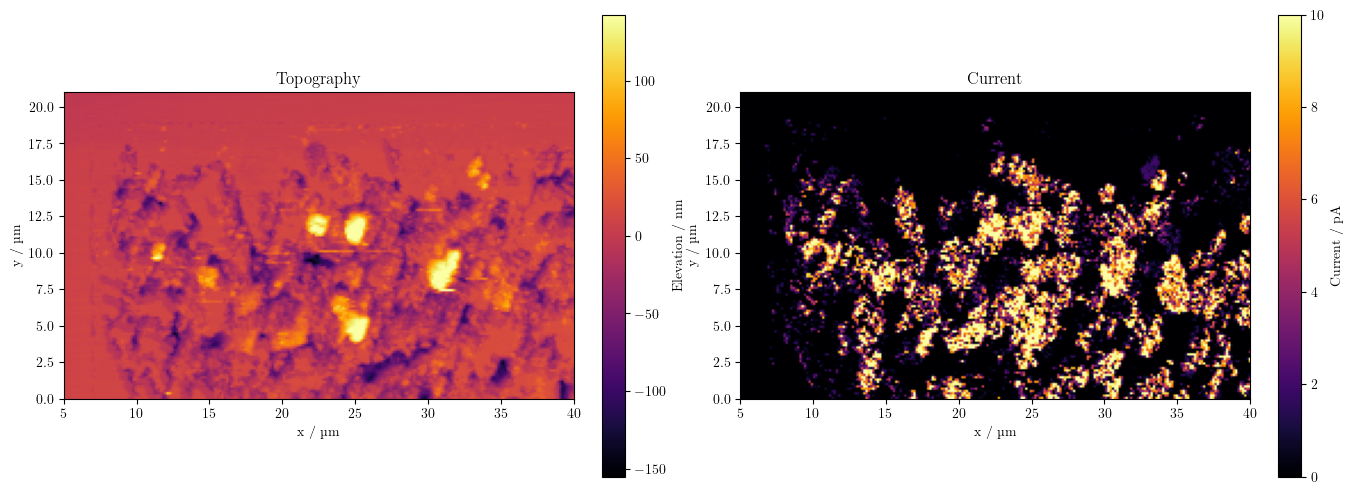

In [51]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
# remove top 1% from colorbar for better contrast
vmax = np.percentile(topography_contact, 99.5)   # ignore top 0,5%
# vmin = np.percentile(topography_array, 1)    # optional

topography = ax1.imshow(topography_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmax=vmax)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

# from matplotlib.colors import PowerNorm => norm=PowerNorm(gamma=0.5)
ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmin=0, vmax=10)  # plasma inferno Spectral viridis magma ,vmin=0, vmax=10
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

### adjusting the colormap scale to match the colorbar on topograpy and current

-0.01447096163823369 9.983316446424757


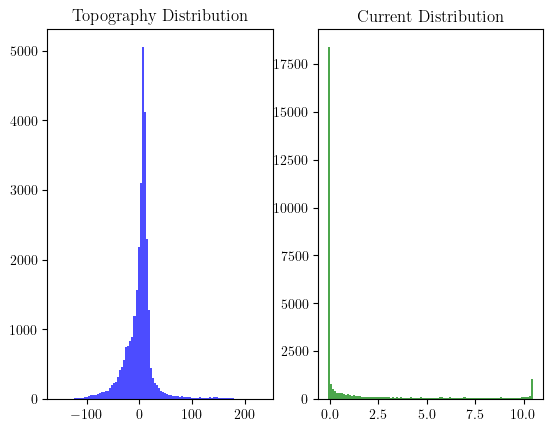

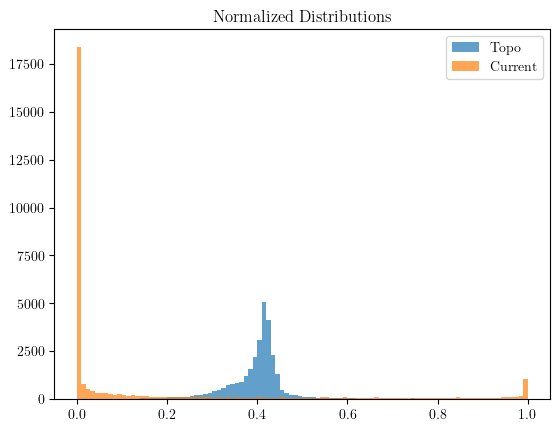

In [87]:
# t_min, t_max = np.percentile(topography_contact, [1, 99])
# c_min, c_max = np.percentile(current_contact, [1, 99])
t_min, t_max = np.percentile(topography_contact, [5, 95])
c_min, c_max = np.percentile(current_contact, [60, 95])
print(c_min, c_max)

fig, ax = plt.subplots(1, 2)

# Plot Histograms to see the distribution
ax[0].hist(topography_contact.flatten(), bins=100, color='blue', alpha=0.7)
ax[0].set_title("Topography Distribution")

ax[1].hist(current_contact.flatten(), bins=100, color='green', alpha=0.7)
ax[1].set_title("Current Distribution")
plt.show()

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

plt.hist(normalize(topography_contact).flatten(), bins=100, alpha=0.7, label='Topo')
plt.hist(normalize(current_contact).flatten(), bins=100, alpha=0.7, label='Current')
plt.legend()
plt.title("Normalized Distributions")
plt.show()

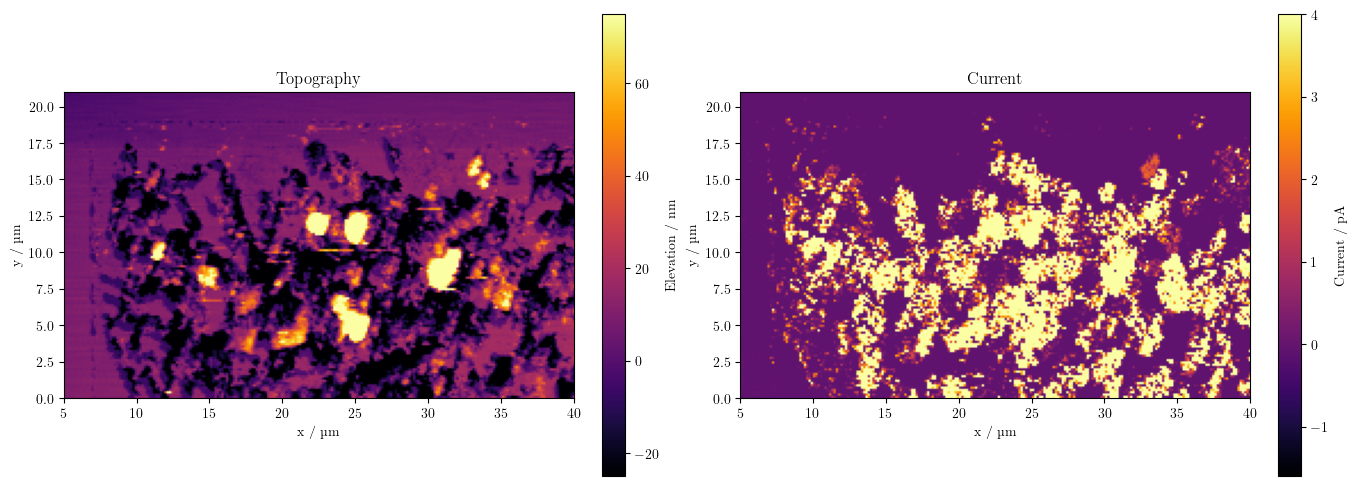

In [145]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)

topography = ax1.imshow(topography_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmin=-25, vmax=75)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_contact, cmap='inferno', extent=[x_min, x_max, y_min, y_max], vmin=-1.6, vmax=4)
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

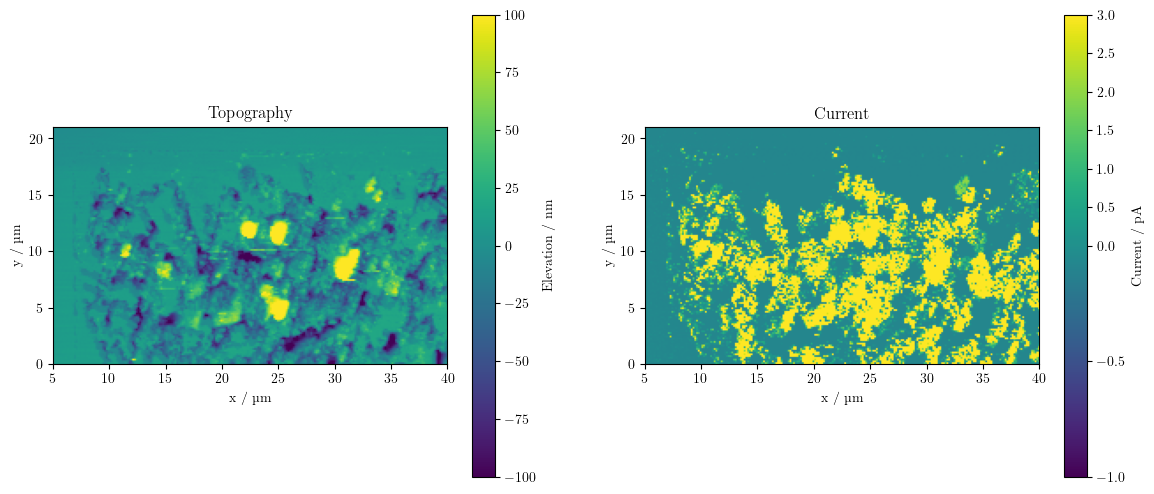

In [146]:
norm_topo = mcolors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=100)
norm_curr = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=3)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Topography Plot
im1 = ax1.imshow(topography_contact, cmap='viridis', norm=norm_topo, extent=[x_min, x_max, y_min, y_max])

cbar1 = plt.colorbar(im1, ax=ax1, label='Elevation (nm)')
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

# Current Plot
im2 = ax2.imshow(current_contact, cmap='viridis', norm=norm_curr,extent=[x_min, x_max, y_min, y_max])

cbar2 = plt.colorbar(im2, ax=ax2, label='Current (pA)')
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()

### 3D plots